In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/television-brands-ecommerce-dataset/TV_Final.csv


# Import Dependencies 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/television-brands-ecommerce-dataset/TV_Final.csv')

# Analysing Data

In [4]:
df.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             912 non-null    object 
 1   Resolution        912 non-null    object 
 2   Size              912 non-null    int64  
 3   Selling Price     912 non-null    int64  
 4   Original Price    912 non-null    int64  
 5   Operating System  901 non-null    object 
 6   Rating            692 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 50.0+ KB


In [6]:
df.shape

(912, 7)

In [7]:
df.describe()

,Size,Selling Price,Original Price,Rating
count,912.000000,912.000000,912.000000,692.000000
mean,45.942982,59358.606360,81975.213816,4.234104
std,12.316492,65866.677856,84823.568826,0.366694
min,17.000000,4849.000000,6999.000000,2.000000
25%,32.000000,19797.500000,28990.000000,4.100000
50%,43.000000,36990.000000,52900.000000,4.300000
75%,55.000000,67064.250000,99900.000000,4.400000
max,85.000000,499990.000000,549990.000000,5.000000


In [8]:
df.nunique()

Brand                59
Resolution            5
Size                 27
Selling Price       515
Original Price      455
Operating System      7
Rating               25
dtype: int64

# Removing Null Values

In [9]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

<AxesSubplot:>

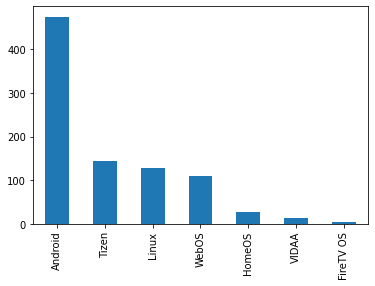

In [10]:
df['Operating System'].value_counts().plot(kind='bar')

In [11]:
df['Operating System'] = df['Operating System'].fillna('Android')

In [12]:
df.isnull().sum()

Brand               0
Resolution          0
Size                0
Selling Price       0
Original Price      0
Operating System    0
Rating              0
dtype: int64

# Top 10 Brands

In [13]:
df1 = df["Brand"].value_counts()[0:10].reset_index()
df1.columns = ["Brand", "Count"]
df1

,Brand,Count
0,SAMSUNG,140
1,LG,122
2,SONY,62
3,TCL,44
4,Panasonic,30
5,Micromax,25
6,Vu,23
7,Lloyd,22
8,Mi,19
9,iFFALCON by TCL,19


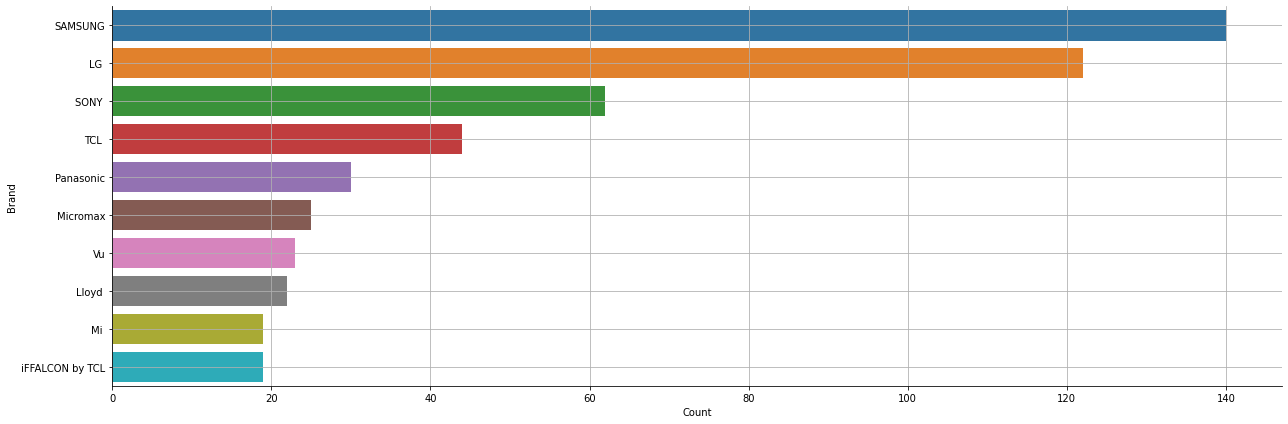

In [14]:
sns.catplot(x="Count", y="Brand", kind="bar", data=df1, height=6, aspect=3)
plt.grid(True)

# Brands and Resolution

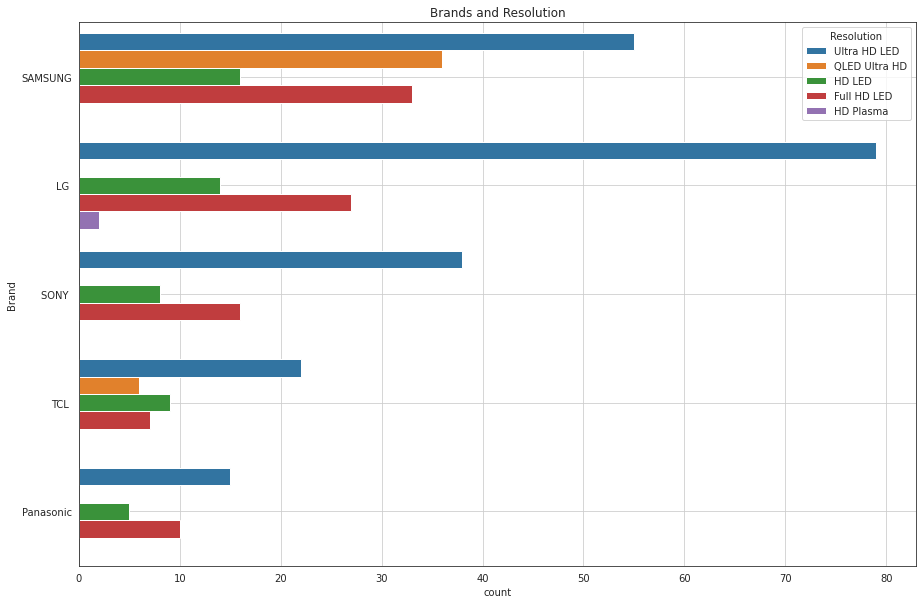

In [15]:
#Brands and Resolution
plt.figure(figsize = (15,10))
sns.set_style('white')
sns.countplot(y="Brand", hue="Resolution", data=df,order=df["Brand"].value_counts().iloc[:5].index,)
plt.title('Brands and Resolution')
plt.grid(True)

# Popularity By Resolution

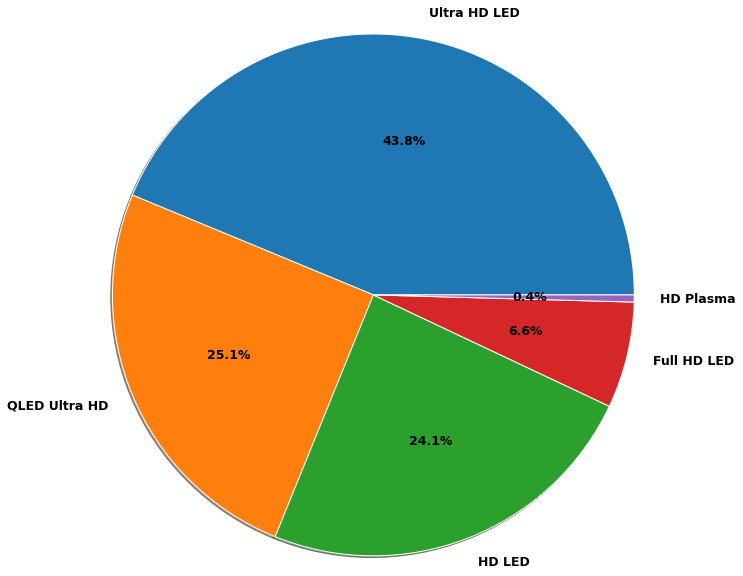

In [16]:
plt.pie(df['Resolution'].value_counts(),labels = df['Resolution'].unique(),autopct='%1.1f%%',radius=3,shadow=True,textprops={'color':'black','weight':'bold','fontsize':12.5})
plt.show()

# Average selling price by Operating System

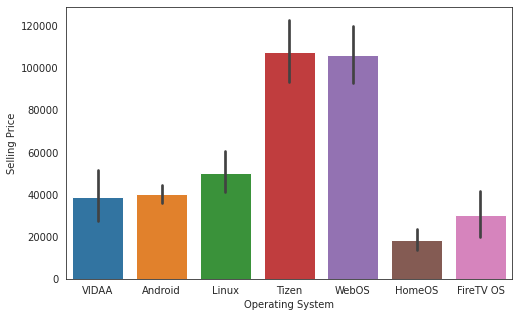

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Operating System'], y=df['Selling Price'])
plt.show()

# Brand and Discount Percentage on Original Price

In [18]:
df['Discount_percentage']=((df['Original Price']-df['Selling Price'])/df['Original Price'])*100

In [19]:
Discount = ['Brand','Discount_percentage']
df[Discount]

,Brand,Discount_percentage
0,TOSHIBA,30.898345
1,TCL,59.228402
2,realme,22.223457
3,Mi,25.001250
4,realme,40.910950
...,...,...
907,SONY,22.281520
908,SONY,20.040462
909,SONY,18.919942
910,SONY,0.000000


# Thank you !!
 Please upvote if you liked my work :):)